# Our data

In [81]:
install.packages("UpSetR")
library(UpSetR)
library(igraph)
library(numbers)
library(SuperExactTest)

also installing the dependency ‘gridExtra’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [13]:
g<-read_graph("a.lgl", format='lgl')
g

IGRAPH e69c58d UN-- 229 658 -- 
+ attr: name (v/c)
+ edges from e69c58d (vertex names):
 [1] 左嗅觉细胞（嗅觉粘膜）--左嗅脑                
 [2] 右嗅觉细胞（嗅觉粘膜）--右嗅脑                
 [3] 左嗅脑                --左大脑皮层听觉区      
 [4] 右嗅脑                --右大脑皮层听觉区      
 [5] 左侧左半视网膜        --右丘脑外侧膝状体      
 [6] 左侧右半视网膜        --左丘脑外侧膝状体      
 [7] 右丘脑外侧膝状体      --右侧左半视网膜        
 [8] 左丘脑外侧膝状体      --右侧右半视网膜        
+ ... omitted several edges

In [68]:
# find node-based modules
mod<-list()
for (i in 1:vcount(g)){
    m<-cluster_spinglass(g, vertex=i, gamma = 0.4)
    mod[[i]]<-V(g)$name[m$community]
}
names(mod)<-V(g)$name

# filter out redundancies
clean_mod<-mod
for (i in 1:(length(clean_mod)-1)){
    j<-i+1
    while (j<=length(clean_mod)){
        if (setequal(clean_mod[[i]], clean_mod[[j]])==TRUE){clean_mod[[j]]<-NA} # if i == j
        else if (all(is.element(clean_mod[[i]], clean_mod[[j]]))==TRUE) {clean_mod[[i]]<-NA}  # if i belongs j
        else if (all(is.element(clean_mod[[j]], clean_mod[[i]]))==TRUE) {clean_mod[[j]]<-NA} # if j belongs i
        else {
            inter <- sum(is.element(clean_mod[[i]], clean_mod[[j]]))
            num <- min(length(clean_mod[[i]]), length(clean_mod[[j]]))
            if (inter/num > 0.8){
                print(inter)
                clean_mod[[i]] <- unique(c(clean_mod[[i]], clean_mod[[j]]))
                clean_mod[[j]] <-NA
            }
        }
        j<-j+1
    }
}

clean_mod<-clean_mod[!is.na(clean_mod)]
print("")
print(length(clean_mod))
length(unique(c(unlist(clean_mod))))
print(clean_mod)

[1] 27
[1] 27
[1] 35
[1] 37
[1] 18
[1] ""
[1] 14


[1] 229

$左大脑皮层中央前回底部
 [1] "左大脑皮层中央前回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层中央后回底部" "左大脑皮层味觉区"       "左滑车神经核"          
 [7] "右滑车神经核"           "左展神经核"             "右展神经核"            
[10] "右迷走神经背核"         "左脑膜"                 "右眼外直肌"            
[13] "左眼外直肌"             "左眼上斜肌"             "右眼上斜肌"            
[16] "左丘脑腹后内侧核"       "左嗅脑"                 "左嗅觉细胞（嗅觉粘膜）"
[19] "左上丘"                 "左丘脑外侧膝状体"       "右侧右半视网膜"        
[22] "左侧右半视网膜"         "右孤束核"               "右上神经节"            
[25] "右舌、会厌乳头"         "右面神经膝"             "右涡神经核"            
[28] "右双极细胞"             "左涡神经核"             "左双极细胞"            

$左大脑皮层中央后回底部
 [1] "左大脑皮层中央后回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层味觉区"       "左三叉神经中脑核"       "右三叉神经中脑核"      
 [7] "左三叉神经脑桥核"       "右三叉神经脑桥核"       "左三叉神经脊束核"      
[10] "右三叉神经脊束核"       "右三叉神经半月神经节"   "左脑膜"                
[13] "右大脑皮层中央后回底部" "左丘脑腹后内侧核"       "左嗅脑"                
[16] "左嗅觉细胞（嗅觉粘膜）" "左上丘"                 "左丘脑外侧膝状体"      
[19] "右侧右半视网膜"     

In [69]:
clean_mod[[1]]

[1] "左大脑皮层中央前回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层中央后回底部" "左大脑皮层味觉区"       "左滑车神经核"          
 [7] "右滑车神经核"           "左展神经核"             "右展神经核"            
[10] "右迷走神经背核"         "左脑膜"                 "右眼外直肌"            
[13] "左眼外直肌"             "左眼上斜肌"             "右眼上斜肌"            
[16] "左丘脑腹后内侧核"       "左嗅脑"                 "左嗅觉细胞（嗅觉粘膜）"
[19] "左上丘"                 "左丘脑外侧膝状体"       "右侧右半视网膜"        
[22] "左侧右半视网膜"         "右孤束核"               "右上神经节"            
[25] "右舌、会厌乳头"         "右面神经膝"             "右涡神经核"            
[28] "右双极细胞"             "左涡神经核"             "左双极细胞"

Warning message in otab.kept[otab.kept] <- kpt:
“number of items to replace is not a multiple of replacement length”

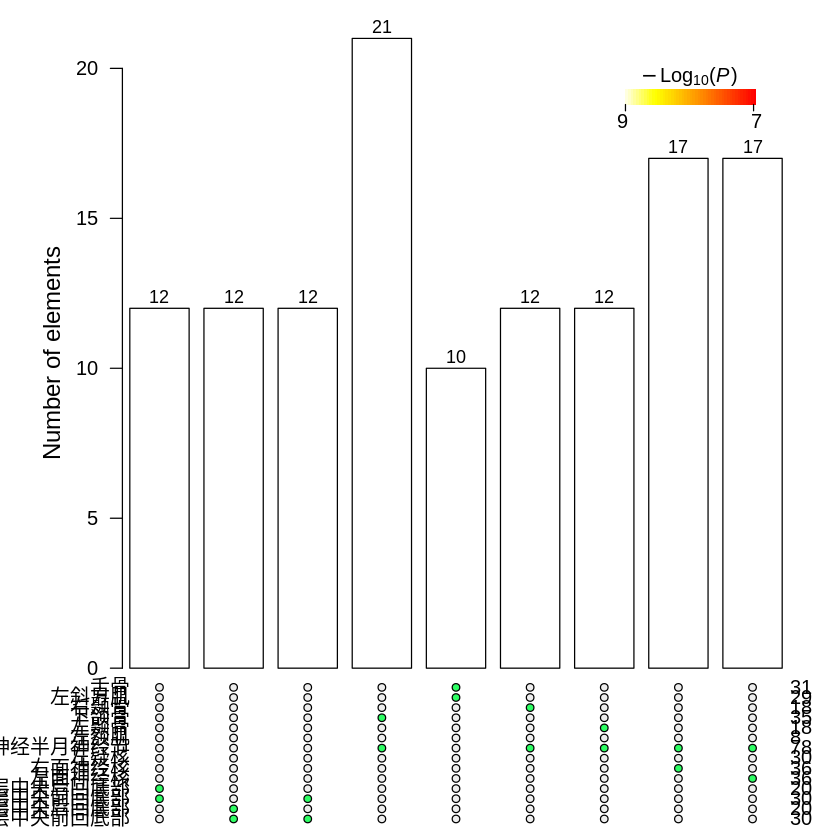

In [74]:
# check overloap between node-based modules
#res<-supertest(clean_mod,n=vcount(g), degree = c(2:length(clean_mod)))
max_degree = 4
res<-supertest(clean_mod,n=vcount(g), degree = c(2, max_degree))
pcorrect<-(0.05/(bell(length(clean_mod))-length(clean_mod)))

plot(res, sort.by = 'p-value', degree = c(2, max_degree),
    Layout='landscape', keep.empty.intersections=FALSE, min.intersection.size=10,
    minMinusLog10PValue=abs(log10(pcorrect)))

In [75]:
pdf("a.pdf", width=100, height=200, onefile = TRUE)
plot.msets(res, sort.by = 'p-value', degree = 2,
        Layout='landscape', keep.empty.intersections=FALSE, min.intersection.size=10,
        minMinusLog10PValue=abs(log10(pcorrect)), )
dev.off()

Warning message in otab.kept[otab.kept] <- kpt:
“number of items to replace is not a multiple of replacement length”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <a6>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x

“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <ad>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <ae>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fail

“conversion failure on '左大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <a6>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fail

“conversion failure on '右大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <ad>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <ae>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央前回底部' in 'mbcsToSbcs': dot substituted for <89>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fail

“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <a7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <e8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fail

“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <a4>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <ae>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <90>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右大脑皮层中央后回底部' in 'mbcsToSbcs': dot substituted for <8e>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fail

“conversion failure on '右面神经核' in 'mbcsToSbcs': dot substituted for <e7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右面神经核' in 'mbcsToSbcs': dot substituted for <a5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右面神经核' in 'mbcsToSbcs': dot substituted for <9e>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右面神经核' in 'mbcsToSbcs': dot substituted for <e7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右面神经核' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右面神经核' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右面神经核' in 'mbcsToSbcs': dot 

“conversion failure on '右三叉神经半月神经节' in 'mbcsToSbcs': dot substituted for <a5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右三叉神经半月神经节' in 'mbcsToSbcs': dot substituted for <9e>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右三叉神经半月神经节' in 'mbcsToSbcs': dot substituted for <e7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右三叉神经半月神经节' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右三叉神经半月神经节' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右三叉神经半月神经节' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on '左额肌' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左额肌' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左额肌' in 'mbcsToSbcs': dot substituted for <a6>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左额肌' in 'mbcsToSbcs': dot substituted for <e9>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左额肌' in 'mbcsToSbcs': dot substituted for <a2>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左额肌' in 'mbcsToSbcs': dot substituted for <9d>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '左额肌' in 'mbcsToSbcs': dot substituted fo

“conversion failure on '下颌骨' in 'mbcsToSbcs': dot substituted for <a8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右颞骨' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右颞骨' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右颞骨' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右颞骨' in 'mbcsToSbcs': dot substituted for <e9>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右颞骨' in 'mbcsToSbcs': dot substituted for <a2>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '右颞骨' in 'mbcsToSbcs': dot substituted fo

“conversion failure on '舌骨' in 'mbcsToSbcs': dot substituted for <e9>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '舌骨' in 'mbcsToSbcs': dot substituted for <aa>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '舌骨' in 'mbcsToSbcs': dot substituted for <a8>”

png 
  2

ERROR: Error in new$fonts: object of type 'closure' is not subsettable


In [24]:
pdf

function (file = if (onefile) "Rplots.pdf" else "Rplot%03d.pdf", 
    width, height, onefile, family, title, fonts, version, paper, 
    encoding, bg, fg, pointsize, pagecentre, colormodel, useDingbats, 
    useKerning, fillOddEven, compress) 
{
    initPSandPDFfonts()
    new <- list()
    if (!missing(width)) 
        new$width <- width
    if (!missing(height)) 
        new$height <- height
    if (!missing(onefile)) 
        new$onefile <- onefile
    if (!missing(title)) 
        new$title <- title
    if (!missing(fonts)) 
        new$fonts <- fonts
    if (!missing(version)) 
        new$version <- version
    if (!missing(paper)) 
        new$paper <- paper
    if (!missing(encoding)) 
        new$encoding <- encoding
    if (!missing(bg)) 
        new$bg <- bg
    if (!missing(fg)) 
        new$fg <- fg
    if (!missing(pointsize)) 
        new$pointsize <- pointsize
    if (!missing(pagecentre)) 
        new$pagecentre <- pagecentre
    if (!missing(colormodel)) 
        new$colormodel <- colormodel
    if (!missing(useDingbats)) 
        new$useDingbats <- useDingbats
    if (!missing(useKerning)) 
        new$useKerning <- useKerning
    if (!missing(fillOddEven)) 
        new$fillOddEven <- fillOddEven
    if (!missing(compress)) 
        new$compress <- compress
    old <- check.options(new, name.opt = ".PDF.Options", envir = .PSenv)
    if (!missing(family) && (inherits(family, "Type1Font") || 
        inherits(family, "CIDFont"))) {
        enc <- family$encoding
        if (inherits(family, "Type1Font") && !is.null(enc) && 
            enc != "default" && (is.null(old$encoding) || old$encoding == 
            "default")) 
            old$encoding <- enc
        family <- family$metrics
    }
    if (is.null(old$encoding) || old$encoding == "default") 
        old$encoding <- guessEncoding()
    if (!missing(family)) {
        if (length(family) == 4L) {
            family <- c(family, "Symbol.afm")
        }
        else if (length(family) == 5L) {
        }
        else if (length(family) == 1L) {
            pf <- pdfFonts(family)[[1L]]
            if (is.null(pf)) 
                stop(gettextf("unknown family '%s'", family), 
                  domain = NA)
            matchFont(pf, old$encoding)
        }
        else stop("invalid 'family' argument")
        old$family <- family
    }
    version <- old$version
    versions <- c("1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", 
        "2.0")
    if (version %in% versions) 
        version <- as.integer(strsplit(version, "[.]")[[1L]])
    else stop("invalid PDF version")
    onefile <- old$onefile
    if (!checkIntFormat(file)) 
        stop(gettextf("invalid 'file' argument '%s'", file), 
            domain = NA)
    .External(C_PDF, file, old$paper, old$family, old$encoding, 
        old$bg, old$fg, old$width, old$height, old$pointsize, 
        onefile, old$pagecentre, old$title, old$fonts, version[1L], 
        version[2L], old$colormodel, old$useDingbats, old$useKerning, 
        old$fillOddEven, old$compress)
    invisible()
}
<bytecode: 0x564280b514d0>
<environment: namespace:grDevices>

In [ ]:
sort(unique(c(clean_mod$右舌下神经核, clean_mod$左舌下神经核)))

In [78]:
clean_mod

$左大脑皮层中央前回底部
 [1] "左大脑皮层中央前回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层中央后回底部" "左大脑皮层味觉区"       "左滑车神经核"          
 [7] "右滑车神经核"           "左展神经核"             "右展神经核"            
[10] "右迷走神经背核"         "左脑膜"                 "右眼外直肌"            
[13] "左眼外直肌"             "左眼上斜肌"             "右眼上斜肌"            
[16] "左丘脑腹后内侧核"       "左嗅脑"                 "左嗅觉细胞（嗅觉粘膜）"
[19] "左上丘"                 "左丘脑外侧膝状体"       "右侧右半视网膜"        
[22] "左侧右半视网膜"         "右孤束核"               "右上神经节"            
[25] "右舌、会厌乳头"         "右面神经膝"             "右涡神经核"            
[28] "右双极细胞"             "左涡神经核"             "左双极细胞"            

$左大脑皮层中央后回底部
 [1] "左大脑皮层中央后回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层味觉区"       "左三叉神经中脑核"       "右三叉神经中脑核"      
 [7] "左三叉神经脑桥核"       "右三叉神经脑桥核"       "左三叉神经脊束核"      
[10] "右三叉神经脊束核"       "右三叉神经半月神经节"   "左脑膜"                
[13] "右大脑皮层中央后回底部" "左丘脑腹后内侧核"       "左嗅脑"                
[16] "左嗅觉细胞（嗅觉粘膜）" "左上丘"                 "左丘脑外侧膝状体"      
[19] "右侧右半视网膜"         "左侧右半视网膜"        

$右大脑皮层中央前回底部
 [1] "右大脑皮层中央前回底部" "右大脑皮层视觉区"       "右大脑皮层听觉区"      
 [4] "右大脑皮层中央后回底部" "右大脑皮层味觉区"       "左滑车神经核"          
 [7] "右滑车神经核"           "左展神经核"             "右展神经核"            
[10] "左迷走神经背核"         "右脑膜"                 "右眼外直肌"            
[13] "左眼外直肌"             "左眼上斜肌"             "右眼上斜肌"            
[16] "右丘脑腹后内侧核"       "右嗅脑"                 "右嗅觉细胞（嗅觉粘膜）"
[19] "右上丘"                 "右丘脑外侧膝状体"       "右侧左半视网膜"        
[22] "左侧左半视网膜"         "左孤束核"               "左上神经节"            
[25] "左舌、会厌乳头"         "左面神经膝"             "右涡神经核"            
[28] "右双极细胞"             "左涡神经核"             "左双极细胞"            

$右大脑皮层中央后回底部
 [1] "右大脑皮层中央后回底部" "右大脑皮层视觉区"       "右大脑皮层听觉区"      
 [4] "右大脑皮层味觉区"       "左三叉神经中脑核"       "右三叉神经中脑核"      
 [7] "左三叉神经脑桥核"       "右三叉神经脑桥核"       "左三叉神经脊束核"      
[10] "右三叉神经脊束核"       "左三叉神经半月神经节"   "右脑膜"                
[13] "左大脑皮层中央后回底部" "右丘脑腹后内侧核"       "右嗅脑"                
[16] "右嗅觉细胞（嗅觉粘膜）" "右上丘"                 "右丘脑外侧膝状体"      
[19] "右侧左半视网膜"         "左侧左半视网膜"        

$左面神经核
 [1] "左面神经核"     "左颈阔肌"       "左枕肌"         "左耳后肌"      
 [5] "左笑肌"         "左颧大肌"       "左颧小肌"       "左额肌"        
 [9] "左颞顶肌"       "左耳前肌"       "左耳下肌"       "左眼轮匝肌"    
[13] "左降眉肌"       "左皱眉肌"       "左提上唇鼻翼肌" "左降眉间肌"    
[17] "左颊肌"         "左提上唇肌"     "左鼻肌"         "左降鼻中隔肌"  
[21] "左提口角肌"     "左口轮匝肌"     "左降下唇肌"     "左降口角肌"    
[25] "左茎突舌骨肌"   "左二腹肌后腹"   "左上颌骨"       "左鼻骨"        
[29] "左帽状腱膜"     "左泪骨"         "左颧骨"         "筛骨"          
[33] "左腭骨"         "梨骨"           "左翼内肌"       "左腭舌肌"      

$右面神经核
 [1] "右面神经核"     "右颈阔肌"       "右枕肌"         "右耳后肌"      
 [5] "右笑肌"         "右颧大肌"       "右颧小肌"       "右额肌"        
 [9] "右颞顶肌"       "右耳前肌"       "右耳下肌"       "右眼轮匝肌"    
[13] "右降眉肌"       "右皱眉肌"       "右提上唇鼻翼肌" "右降眉间肌"    
[17] "右颊肌"         "右提上唇肌"     "右鼻肌"         "右降鼻中隔肌"  
[21] "右提口角肌"     "右口轮匝肌"     "右降下唇肌"     "右降口角肌"    
[25] "右茎突舌骨肌"   "右二腹肌后腹"   "右上颌骨"       "右鼻骨"        
[29] "右帽状腱膜"     "右泪骨"         "右颧骨"         "筛骨"          
[33] "右腭骨"         "梨骨"           "右翼内肌"       "右腭舌肌"      

$左疑核
 [1] "左疑核"       "左茎突咽肌"   "左咽中缩肌"   "左咽下缩肌"   "左环甲肌"    
 [6] "左腭咽肌"     "左腭帆提肌"   "左咽鼓管咽肌" "左甲杓肌"     "左环杓肌"    
[11] "杓横肌"       "杓斜肌"       "左环杓后肌"   "左副神经核"   "左杓状软骨"  
[16] "环状软骨"     "甲状软骨"     "右咽下缩肌"   "右环甲肌"     "右杓状软骨"  
[21] "右甲杓肌"     "右环杓后肌"   "右疑核"       "右环杓肌"     "右副神经核"  
[26] "右咽中缩肌"   "右咽鼓管咽肌" "右腭咽肌"     "右茎突咽肌"   "右腭帆提肌"  

$右三叉神经半月神经节
 [1] "右三叉神经半月神经节"   "左大脑皮层中央后回底部" "左三叉神经中脑核"      
 [4] "右三叉神经中脑核"       "左三叉神经脑桥核"       "右三叉神经脑桥核"      
 [7] "左三叉神经脊束核"       "右三叉神经脊束核"       "右颧骨"                
[10] "额骨"                   "筛骨"                   "右鼻骨"                
[13] "右上颌骨"               "右泪骨"                 "右腭骨"                
[16] "梨骨"                   "右锤骨"                 "右砧骨"                
[19] "右镫骨"                 "右大脑皮层中央后回底部" "左三叉神经半月神经节"  
[22] "左泪骨"                 "左鼻骨"                 "左上颌骨"              
[25] "左腭骨"                 "左腭舌肌"               "

In [79]:
res[sort(res$P.value, decreasing = TRUE)[1]]

$x
$x$左大脑皮层中央前回底部
 [1] "左大脑皮层中央前回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层中央后回底部" "左大脑皮层味觉区"       "左滑车神经核"          
 [7] "右滑车神经核"           "左展神经核"             "右展神经核"            
[10] "右迷走神经背核"         "左脑膜"                 "右眼外直肌"            
[13] "左眼外直肌"             "左眼上斜肌"             "右眼上斜肌"            
[16] "左丘脑腹后内侧核"       "左嗅脑"                 "左嗅觉细胞（嗅觉粘膜）"
[19] "左上丘"                 "左丘脑外侧膝状体"       "右侧右半视网膜"        
[22] "左侧右半视网膜"         "右孤束核"               "右上神经节"            
[25] "右舌、会厌乳头"         "右面神经膝"             "右涡神经核"            
[28] "右双极细胞"             "左涡神经核"             "左双极细胞"            

$x$左大脑皮层中央后回底部
 [1] "左大脑皮层中央后回底部" "左大脑皮层视觉区"       "左大脑皮层听觉区"      
 [4] "左大脑皮层味觉区"       "左三叉神经中脑核"       "右三叉神经中脑核"      
 [7] "左三叉神经脑桥核"       "右三叉神经脑桥核"       "左三叉神经脊束核"      
[10] "右三叉神经脊束核"       "右三叉神经半月神经节"   "左脑膜"                
[13] "右大脑皮层中央后回底部" "左丘脑腹后内侧核"       "左嗅脑"                
[16] "左嗅觉细胞（嗅觉粘膜）" "左上丘"                 "左丘脑外侧膝状体"      
[19] "右侧右半视网膜"         "左侧右半视网膜"        

$x$右大脑皮层中央前回底部
 [1] "右大脑皮层中央前回底部" "右大脑皮层视觉区"       "右大脑皮层听觉区"      
 [4] "右大脑皮层中央后回底部" "右大脑皮层味觉区"       "左滑车神经核"          
 [7] "右滑车神经核"           "左展神经核"             "右展神经核"            
[10] "左迷走神经背核"         "右脑膜"                 "右眼外直肌"            
[13] "左眼外直肌"             "左眼上斜肌"             "右眼上斜肌"            
[16] "右丘脑腹后内侧核"       "右嗅脑"                 "右嗅觉细胞（嗅觉粘膜）"
[19] "右上丘"                 "右丘脑外侧膝状体"       "右侧左半视网膜"        
[22] "左侧左半视网膜"         "左孤束核"               "左上神经节"            
[25] "左舌、会厌乳头"         "左面神经膝"             "右涡神经核"            
[28] "右双极细胞"             "左涡神经核"             "左双极细胞"            

$x$右大脑皮层中央后回底部
 [1] "右大脑皮层中央后回底部" "右大脑皮层视觉区"       "右大脑皮层听觉区"      
 [4] "右大脑皮层味觉区"       "左三叉神经中脑核"       "右三叉神经中脑核"      
 [7] "左三叉神经脑桥核"       "右三叉神经脑桥核"       "左三叉神经脊束核"      
[10] "右三叉神经脊束核"       "左三叉神经半月神经节"   "右脑膜"                
[13] "左大脑皮层中央后回底部" "右丘脑腹后内侧核"       "右嗅脑"                
[16] "右嗅觉细胞（嗅觉粘膜）" "右上丘"                 "右丘脑外侧膝状体"      
[19] "右侧左半视网膜"         "左侧左半视网膜"        

$x$左面神经核
 [1] "左面神经核"     "左颈阔肌"       "左枕肌"         "左耳后肌"      
 [5] "左笑肌"         "左颧大肌"       "左颧小肌"       "左额肌"        
 [9] "左颞顶肌"       "左耳前肌"       "左耳下肌"       "左眼轮匝肌"    
[13] "左降眉肌"       "左皱眉肌"       "左提上唇鼻翼肌" "左降眉间肌"    
[17] "左颊肌"         "左提上唇肌"     "左鼻肌"         "左降鼻中隔肌"  
[21] "左提口角肌"     "左口轮匝肌"     "左降下唇肌"     "左降口角肌"    
[25] "左茎突舌骨肌"   "左二腹肌后腹"   "左上颌骨"       "左鼻骨"        
[29] "左帽状腱膜"     "左泪骨"         "左颧骨"         "筛骨"          
[33] "左腭骨"         "梨骨"           "左翼内肌"       "左腭舌肌"      

$x$右面神经核
 [1] "右面神经核"     "右颈阔肌"       "右枕肌"         "右耳后肌"      
 [5] "右笑肌"         "右颧大肌"       "右颧小肌"       "右额肌"        
 [9] "右颞顶肌"       "右耳前肌"       "右耳下肌"       "右眼轮匝肌"    
[13] "右降眉肌"       "右皱眉肌"       "右提上唇鼻翼肌" "右降眉间肌"    
[17] "右颊肌"         "右提上唇肌"     "右鼻肌"         "右降鼻中隔肌"  
[21] "右提口角肌"     "右口轮匝肌"     "右降下唇肌"     "右降口角肌"    
[25] "右茎突舌骨肌"   "右二腹肌后腹"   "右上颌骨"       "右鼻骨"        
[29] "右帽状腱膜"     "右泪骨"         "右颧骨"         "筛骨"          
[33] "右腭骨"         "梨骨"           "右翼内肌"       "右腭舌肌"      

$x$左疑核
 [1] "左疑核"       "左茎突咽肌"   "左咽中缩肌"   "左咽下缩肌"   "左环甲肌"    
 [6] "左腭咽肌"     "左腭帆提肌"   "左咽鼓管咽肌" "左甲杓肌"     "左环杓肌"    
[11] "杓横肌"       "杓斜肌"       "左环杓后肌"   "左副神经核"   "左杓状软骨"  
[16] "环状软骨"     "甲状软骨"     "右咽下缩肌"   "右环甲肌"     "右杓状软骨"  
[21] "右甲杓肌"     "右环杓后肌"   "右疑核"       "右环杓肌"     "右副神经核"  
[26] "右咽中缩肌"   "右咽鼓管咽肌" "右腭咽肌"     "右茎突咽肌"   "右腭帆提肌"  

$x$右三叉神经半月神经节
 [1] "右三叉神经半月神经节"   "左大脑皮层中央后回底部" "左三叉神经中脑核"      
 [4] "右三叉神经中脑核"       "左三叉神经脑桥核"       "右三叉神经脑桥核"      
 [7] "左三叉神经脊束核"       "右三叉神经脊束核"       "右颧骨"                
[10] "额骨"                   "筛骨"                   "右鼻骨"                
[13] "右上颌骨"               "右泪骨"                 "右腭骨"                
[16] "梨骨"                   "右锤骨"                 "右砧骨"                
[19] "右镫骨"                 "右大脑皮层中央后回底部" "左三叉神经半月神经节"  
[22] "左泪骨"                 "左鼻骨"                 "左上颌骨"              
[25] "左腭骨"                 "左腭

In [ ]:
pcorrect<-(0.05/(bell(length(clean_mod))-length(clean_mod)))
minMinusLog10PValue=abs(log10(pcorrect))

for (i in 1:length(clean_mod)-1){
    res<-supertest(clean_mod, n=vcount(g), degree = 2)
    
    na <- names(sort(res$P.value, decreasing = TRUE)[1])  # the name of the set with the max p value
    print(res$P.value[na])
    
    # merge
    if (res$P.value[na] > 1e-5){
        idx<-c(unlist(gregexpr("1", na)))
        clean_mod[[idx[[1]]]]<-sort(unique(c(unlist(clean_mod[idx]))))
        clean_mod[[idx[[2]]]] <- NA
        clean_mod<-clean_mod[!is.na(clean_mod)]
    }
}

# Paper

In [ ]:
library(igraph)
library(numbers)
library(SuperExactTest)

In [ ]:
load(url("https://ndownloader.figshare.com/files/23552735"))

In [ ]:
for (i in 1: length(networks)){print(networks[i]); print(graph.list[[i]])}

In [ ]:
# find node-based modules
g<-graph.list[[1]]
mod<-list()
for (i in 1:vcount(g)){
    m<-cluster_spinglass(g, vertex=i)
    mod[[i]]<-V(g)$name[m$community]
}
names(mod)<-V(g)$name

# filter out redundancies
clean_mod<-mod
for (i in 1:(length(clean_mod)-1)){
    j<-i+1
    while (j<=length(clean_mod)){
        if (setequal(clean_mod[[i]], clean_mod[[j]])==TRUE){clean_mod[[j]]<-NA} # if i == j
        if (all(is.element(clean_mod[[i]], clean_mod[[j]]))==TRUE) {clean_mod[[i]]<-NA}  # if i belongs j
        if (all(is.element(clean_mod[[j]], clean_mod[[i]]))==TRUE) {clean_mod[[j]]<-NA} # if j belongs i
        j<-j+1
    }
}

clean_mod<-clean_mod[!is.na(clean_mod)]
print(clean_mod)

In [ ]:
ls

In [ ]:
# check overloap between node-based modules
res<-supertest(clean_mod,n=vcount(g), degree = c(2:length(clean_mod)))
pcorrect<-(0.05/(bell(length(clean_mod))-length(clean_mod)))

plot(res, sort.by = 'p-value', degree = c(2:length(clean_mod)),
    Layout='landscape', keep.empty.intersections=FALSE,min.intersection.size=1,
    minMinusLog10PValue=abs(log10(pcorrect)))

In [ ]:
# details
facial<-sort(unique(c(clean_mod$Ethmoidal, clean_mod$Frontal)))
cranial<-sort(unique(c(clean_mod$Sphenoidal, clean_mod$Occipital)))
print(facial)

In [ ]:
print(cranial)

In [ ]:
print(intersect(facial, cranial))

In [ ]:
# testing
vids<-c(1:vcount(g))[is.element(V(g)$name, facial)]
in.links<-degree(induced_subgraph(g, vids))
out.links<-degree(g, vids)-in.links
res<-wilcox.test(in.links, out.links, alternative="greater")
print("Facial module")

In [ ]:
print(res)